<a href="https://colab.research.google.com/github/sid1336/Computational-Physics-Projects/blob/main/Photonic_Crystals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstact: This Research Project Mainly focuses on How dark matter partcles would potentially interact with a photonic crystal. The main objective of this Project is to verify this https://arxiv.org/abs/2401.17260v1 paper - Dark Matter Searches on a Photonic Chip.

In [97]:
!pip install legume-gme

In [98]:

import legume
from legume import GuidedModeExp, PhotCryst, Lattice, gme
from legume.minimize import Minimize
import matplotlib.pyplot as plt
import time
import autograd.numpy as np
from autograd import grad, value_and_grad

Creating a photonic crystal

```
# This is formatted as code
```



Initializations

In [99]:
D = 1
eps_b = 11.3
eps_lower, eps_upper = 1.0, 1.0
gmax = 10
c = 1
numeig = 10

Photonic Structure

In [100]:
lattice = legume.Lattice([1/10.,0],[0,1/10.])
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)

Define the path in the Brillouin zone

In [101]:
path = lattice.bz_path([[0, 0], [4 * 2 * np.pi, 0]], [10])

Printing Kpoints

In [102]:
print("K-points path:", path['kpoints'])

K-points path: [[ 0.          2.51327412  5.02654825  7.53982237 10.05309649 12.56637061
  15.07964474 17.59291886 20.10619298 22.61946711 25.13274123]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


Simulation options

In [103]:
options = {'gmode_inds': [1, 3, 5, 7, 9],  # Take only the modes with H in the xy-plane
           'numeig': numeig,
           'verbose': True
           }

calling the Guided mode expansion object from legume

In [104]:
gme = GuidedModeExp(phc, gmax=gmax)

# Running GME

In [105]:
npw = np.shape(gme.gvec)[1]  # Number of plane waves in the expansion
print(f'Number of reciprocal lattice vectors in the expansion: npw = {npw}')

# Run the simulation
gme.run(kpoints=path['kpoints'], **options)

Number of reciprocal lattice vectors in the expansion: npw = 5


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'      │ 0.332    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity             │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver          │ 0.015    │ │--------------------│    2% │
│ Creating GME matrix                                      │ 0.254    │ │███████-------------│   38% │
├──────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 11 k-points  │ 0.675    │ │████████████████████│  100% │
└──────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes        ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 110 eigenmodes │ 1.826    │
└─────────────────────────────────────────────────────────────────┴──────────┘

Visualization of structure

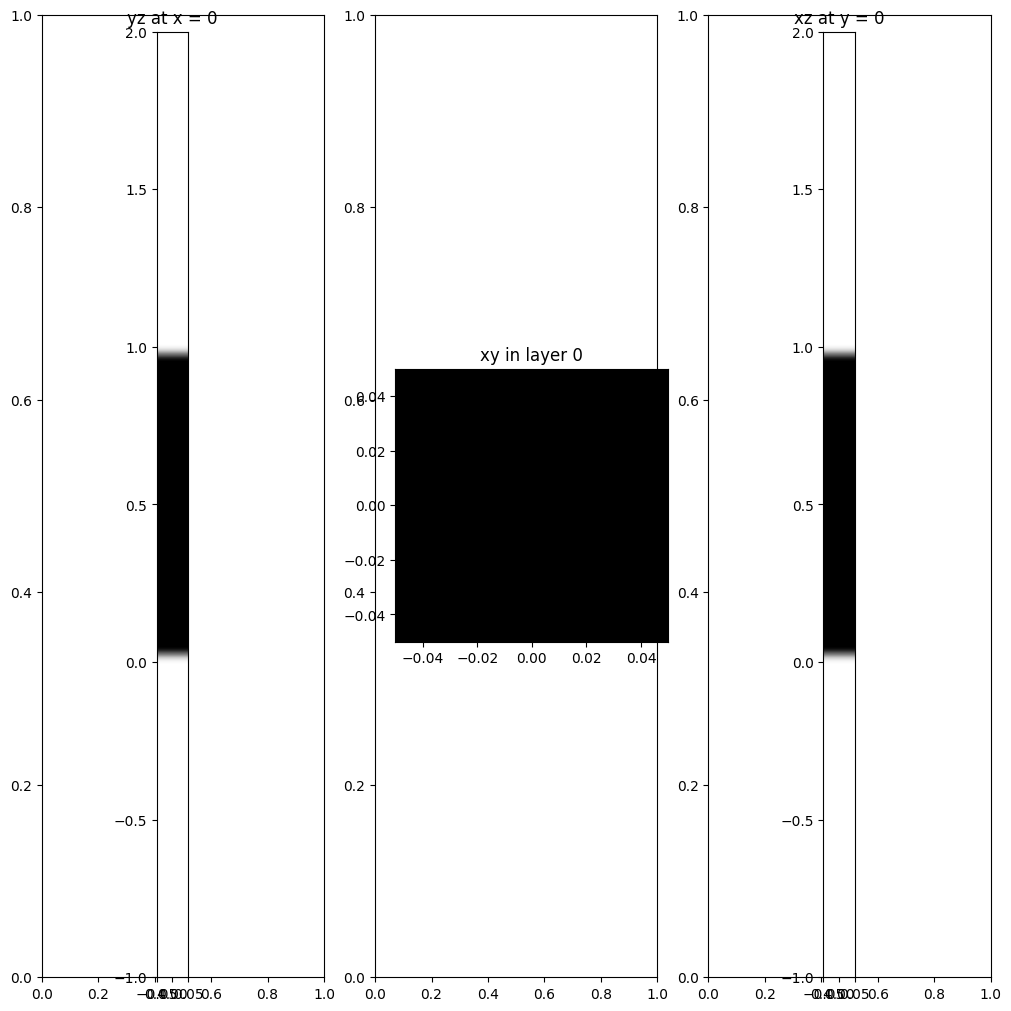

In [106]:
def plot_structure_side_by_side(phc):
    fig = plt.figure(constrained_layout=True, figsize=(10, 10))
    gs = fig.add_gridspec(1, 3)

    # Plot yz view
    ax1 = fig.add_subplot(gs[0])
    legume.viz.structure(phc, yz=True, xy=False, xz=False, fig=fig, gridspec=gs[0],cbar=False)


    # Plot xy view
    ax2 = fig.add_subplot(gs[1])
    legume.viz.structure(phc, yz=False, xy=True, xz=False, fig=fig, gridspec=gs[1],cbar=False)


    # Plot xz view
    ax3 = fig.add_subplot(gs[2])
    legume.viz.structure(phc, yz=False, xy=False, xz=True, fig=fig, gridspec=gs[2],cbar=False)


    plt.show()

# Example usage with your photonic crystal object
plot_structure_side_by_side(phc)

Plotting the bands

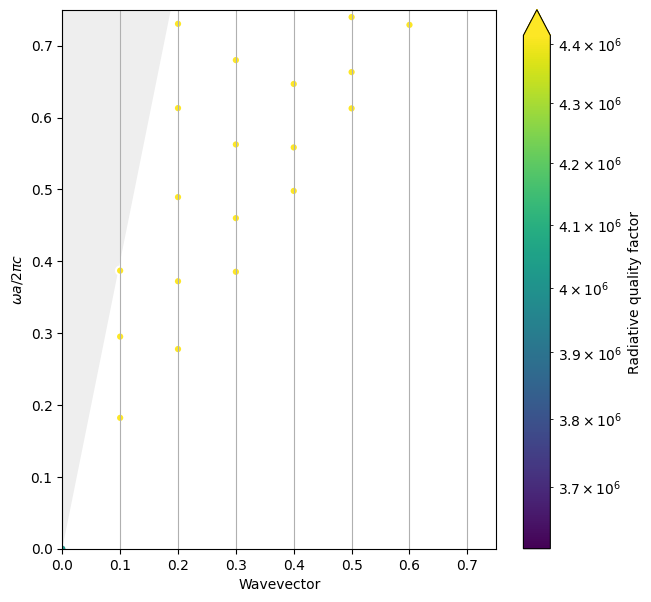

In [107]:
fig, ax = plt.subplots(1, figsize=(7, 7))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)
ax.set_ylim([0, 0.75])
ax.set_xlim([0, 0.75])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.xaxis.grid(True)
plt.show()

# Plot fields for different configurations

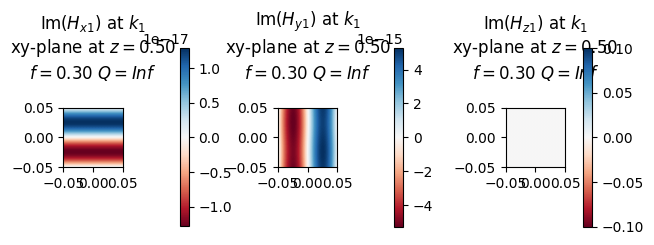

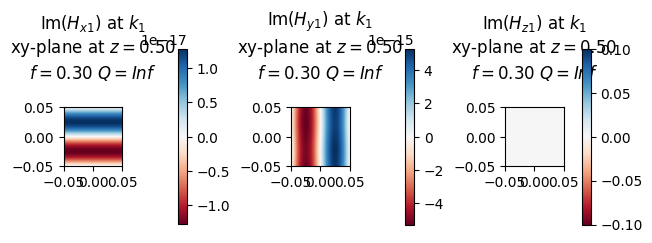

In [108]:

legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='im')


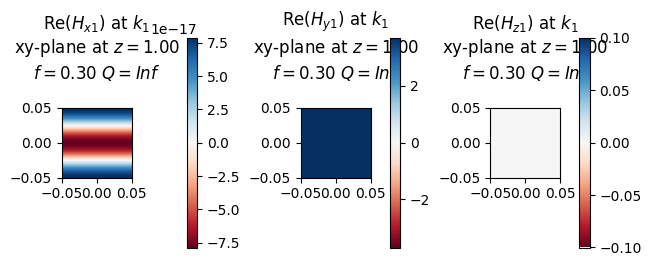

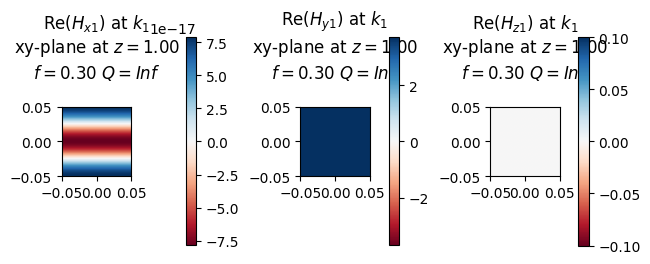

In [109]:
legume.viz.field(gme, 'H', 1, 1, z=D, periodic=True, val='re')


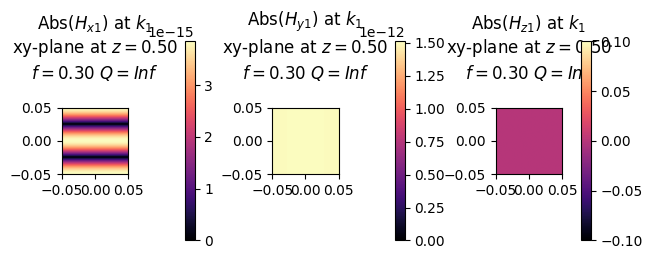

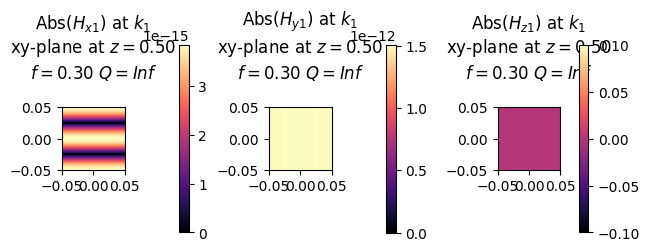

In [110]:
legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='abs')


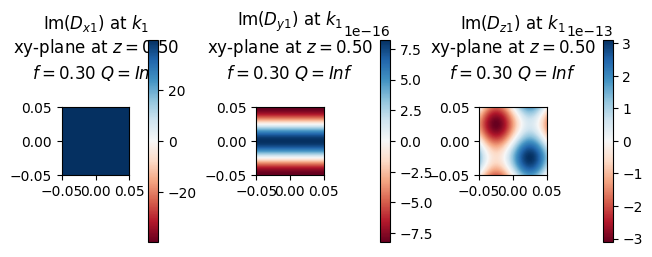

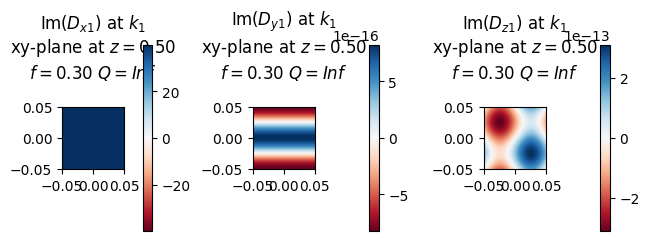

In [111]:
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='im')


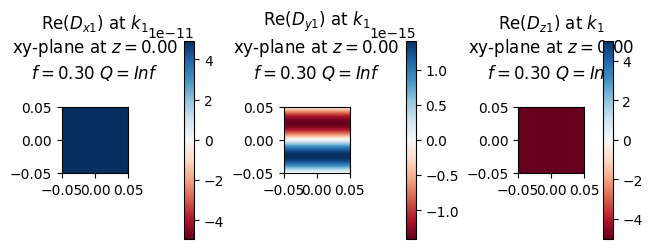

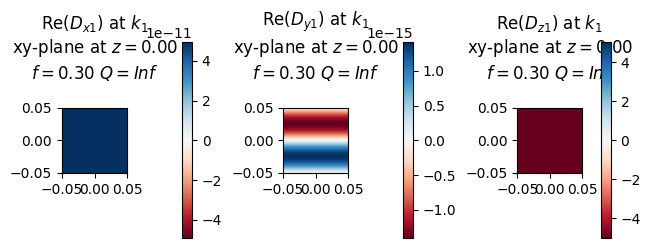

In [112]:
legume.viz.field(gme, 'D', 1, 1, z=0, periodic=True, val='re')


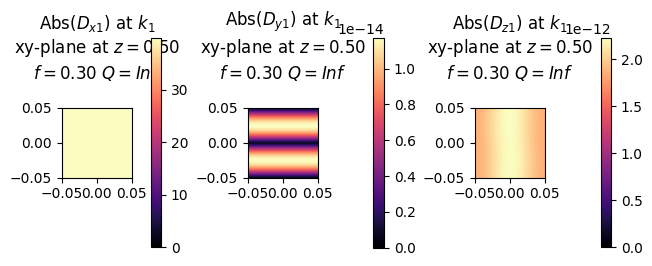

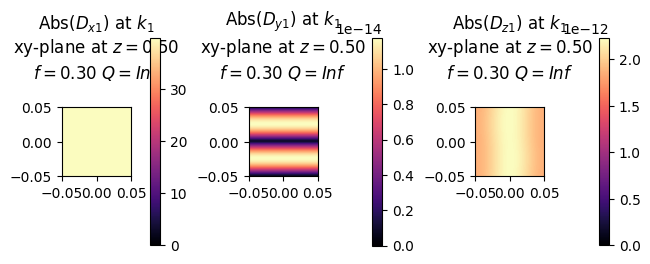

In [113]:
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='abs')

Verification of my data with an actual data set
# Given simulation results for n1, n2, and n3

In [114]:

n1_data = np.array([
    [0.05656324478351993, 0.019112207151664506],
    [0.2263314060641448, 0.08569667077681853],
    [0.7355051783559106, 0.22996300863131935],
    [1.2163929712042465, 0.36683107274969173],
    [1.6171400603306434, 0.48397040690505544],
    [2.2300465187883347, 0.6627620221948212],
    [2.8005123892764257, 0.8255240443896423],
    [3.856600715427886, 1.1350184956843403],
    [3.9933308062433666, 1.1769420468557337]
])

n2_data = np.array([
    [0.20294275269810447, 0.157213316892725],
    [0.6790929780302934, 0.28298397040690504],
    [1.16937166957863, 0.40628853267570864],
    [1.994417164459821, 0.6381011097410603],
    [2.7440246667218577, 0.846485819975339],
    [3.545513035572424, 1.0782983970406907],
    [3.9910389970648, 1.2040690505548703]
])

n3_data = np.array([
    [0.3446573106243802, 0.31504315659679416],
    [0.811306258614255, 0.40752157829839697],
    [1.3392763518115902, 0.530826140567201],
    [1.8955498526590373, 0.6689272503082615],
    [2.480135475259936, 0.8255240443896423],
    [3.479602462605606, 1.099260172626387],
    [3.988767520794031, 1.2398273736128238]
])

MY Plot

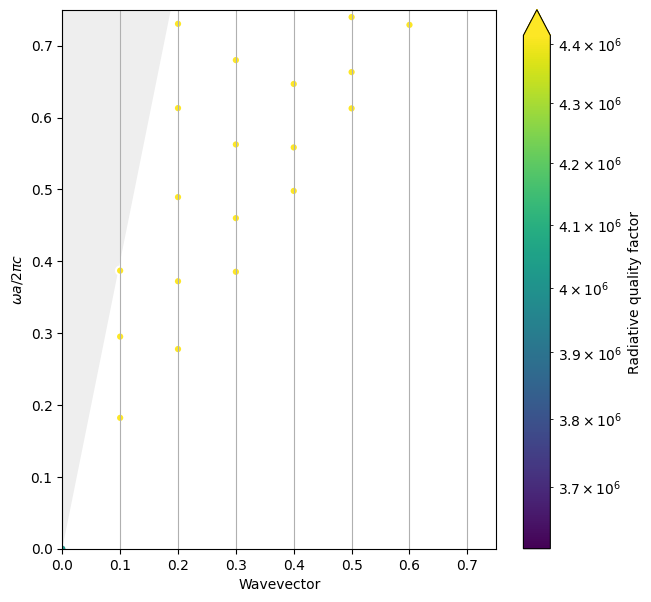

In [115]:
fig, ax = plt.subplots(1, figsize=(7, 7))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)
ax.set_ylim([0, 0.75])
ax.set_xlim([0, 0.75])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.xaxis.grid(True)
plt.show()

Super imposed plot

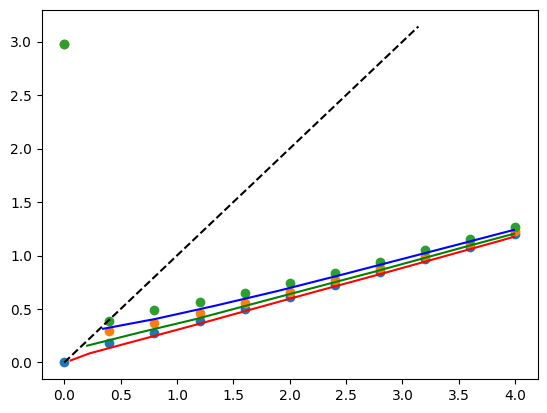

In [116]:
# Plot the simulation results for n1, n2, and n3 over lapping the previous results
ax.set_ylim([0, 1.5])
ax.set_xlim([0, np.pi])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.legend()
ax.xaxis.grid(True)
plt.show()

k_values = path['kpoints'][0]/(2.*np.pi)
plt.plot(k_values, gme.freqs.transpose()[0],'o')
plt.plot(k_values, gme.freqs.transpose()[1],'o')
plt.plot(k_values, gme.freqs.transpose()[2],'o')
# Adding the given data points for n1, n2, and n3 as lines
plt.plot(n1_data[:, 0], n1_data[:, 1], 'r-', label='n1 Data')
plt.plot(n2_data[:, 0], n2_data[:, 1], 'g-', label='n2 Data')
plt.plot(n3_data[:, 0], n3_data[:, 1], 'b-', label='n3 Data')

# Plot the light line
k_values = np.linspace(0, np.pi, 100)
light_line = k_values
plt.plot(k_values, light_line, 'k--', label='Light Line $\omega = ck$')
plt.show()

Introduction of the cavity

Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.016    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.010    │ │██████--------------│   31% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.002    │ │█-------------------│    7% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.033    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Cavity quality factor: 15612472503411902942401903198208.00


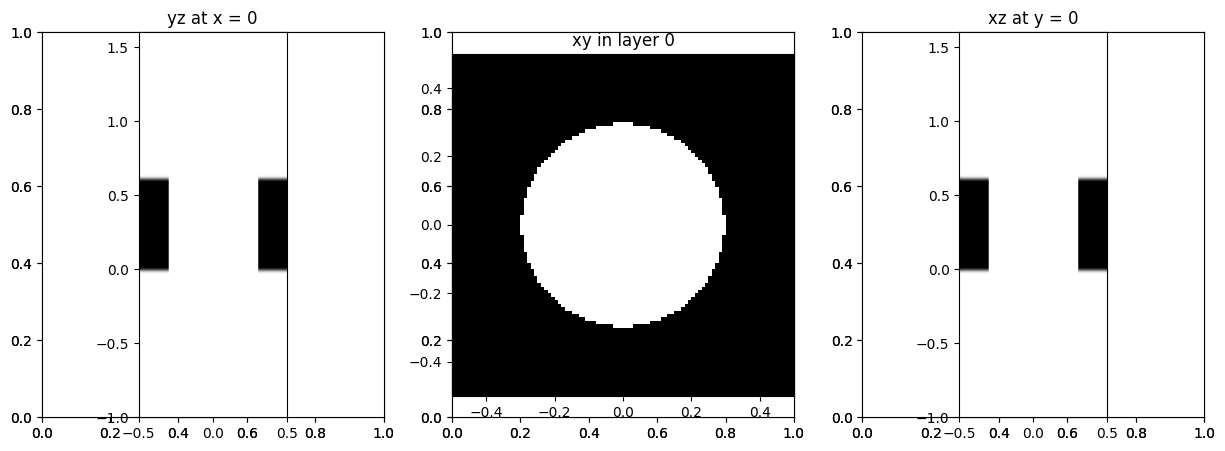

In [117]:
D, r, eps_c, eps_b = 0.6, 0.3, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')

def cavity(dx, dy):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(x_cent=xc + dx[0], y_cent=yc + dy[0], r=r))
    return phc

def gme_cavity(dx, dy, gmax, truncate_g, options):
    phc = cavity(dx, dy)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    (freq_im, _, _) = gme.compute_rad(0, [Nx * Ny])
    Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    return (gme, Q)

# Run GME simulation and visualize results
(gme, Q) = gme_cavity(dx, dy, gmax, truncate_g, options)
print("Cavity quality factor: %1.2f" % Q)

# Function to plot the structure from different views side by side
def plot_structure_side_by_side(phc):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    gs = fig.add_gridspec(1, 3)

    # Plot yz view
    ax1 = fig.add_subplot(gs[0])
    legume.viz.structure(phc, yz=True, xy=False, xz=False, fig=fig, gridspec=gs[0],cbar=False)


    # Plot xy view
    ax2 = fig.add_subplot(gs[1])
    legume.viz.structure(phc, yz=False, xy=True, xz=False, fig=fig, gridspec=gs[1],cbar=False)


    # Plot xz view
    ax3 = fig.add_subplot(gs[2])
    legume.viz.structure(phc, yz=False, xy=False, xz=True, fig=fig, gridspec=gs[2],cbar=False)

# Example usage with your photonic crystal object
plot_structure_side_by_side(phc)


New lattice for integral

In [130]:
# Define parameters
D, r, eps_c, eps_b = 1, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

# Initialize lattice and photonic crystal
a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1, 5, 9, 13, 17], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')

Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13


Integral function

In [131]:
def integral_E_j(num_layers, j, A_j, B_j, X_j, omega, eps_j, g, d_j, g_hat):
    """
    Compute the Integral[E(z) z] over one layer using the analytic parametrization given in the supplementary material
    https://pubs-acs-org.ezproxy.library.yorku.ca/doi/suppl/10.1021/acsphotonics.0c00327/suppl_file/ph0c00327_si_001.pdf
    Note that this function is called for several wavenumbers g simultaneously, so that A_j, etc are all vectors [A_j1, Aj2, ...]
    Args:
        num_layers: number of layers in the photonic structure
        j: layer index from 0 to num_layers - 1
        A_j, B_j: expansion coefficients of the guided modes in the homogeneous waveguide
        X_j: quantity related to the frequency, Eq. S10 in the supplementary info
        omega: frequency of the mode
        eps_j: average dielectric constant in the j'th layer
        g: magnitude of the 2D wavevector
        d_j: thickness of the j'th layer
        g_hat: unit wavevector
    """

    N = num_layers - 1
    c = 1
    if j == 0:
        g_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    elif j == N:
        g_hat_coef = c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    else:
        g_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((B_j - A_j) * X_j)
        z_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((A_j + B_j) * g)
    return (np.array([g_hat_coef * g_hat[0], g_hat_coef * g_hat[1], z_hat_coef]))


# Debugging: Print the guided mode arrays


In [132]:
kpoints = np.array([[0], [0]])
gme.run(kpoints=kpoints, **options)

print(gme.g_array.__sizeof__())
print(gme.omegas_tm.__sizeof__())
print(gme.coeffs_tm.__sizeof__())
print(gme.gvec.__sizeof__())
print(gme.delta_gx.__sizeof__())
print(gme.eigvecs.__sizeof__())

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 5 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.033    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.018    │ │████----------------│   24% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.002    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.017    │ │████----------------│   24% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.074    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 5 guided modes     ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 6 eigenmodes │ 0.110    │
└───────────────────────────────────────────────────────────────┴──────────┘

72
72
72
128
24
72


# Ensure guided modes are computed

In [133]:
tm_modes = [mode for mode in range(len(gme.freqs[0])) if mode % 2 == 1]

Print

In [134]:
print("Guided modes were found.")
print(f'Number of TM modes: {len(tm_modes)}')
print("TM modes available:", tm_modes)

Guided modes were found.
Number of TM modes: 3
TM modes available: [1, 3, 5]


Chosing a mode

In [ ]:
tm_mode_index = tm_modes[0]

Validation of index

gk calculation

In [ ]:
k = gme.kpoints[:, kind]
kx, ky = k[0], k[1]
print("kx,ky=", kx, "\t", ky)
gkx = gme.gvec[0, :] + kx + gme.delta_gx
gky = gme.gvec[1, :] + ky
print("gkx,gky = ", gkx, "\t", gky)
gk = np.sqrt(np.square(gkx) + np.square(gky))
print("gk = ", gk)

# Unit vectors in the propagation direction; we add a tiny component in the x-direction to avoid problems at gk = 0

In [ ]:
pkx = gkx / gk
pky = gky / gk

# Unit vectors in-plane orthogonal to the propagation direction

In [ ]:
qkx = gky / gk
qky = -gkx / gk

# Get the coefficients for the TM mode

In [ ]:
omega = gme.freqs[kind][mind] * 2 * np.pi
evec = gme.eigvecs[kind][:, mind]
print("evec = ", evec.shape)
num_layers = gme.eps_array.size
print("number of layers = ", num_layers)
print("d_array = ", gme.d_array)
count = 0
for im1 in range(gme.gmode_include[kind].size):
  mode1 = gme.gmode_include[kind][im1]
  (indmode, oms, As, Bs, chis) = \
            gme._get_guided(gk, kind, mode1)
  print(As.shape, "\t", Bs.shape, "\t", chis.shape)
    # Check the valid mode index
total_integral = 0.
for lind in range(num_layers):
      eps_j = gme.eps_array[lind]
      if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
      else:
            d_j = gme.d_array[lind - 1]

      print("eps_j = ", eps_j)
      g_hat = np.array([pkx[indmode], pky[indmode]])
      g_norm = gk[indmode]
      res = integral_E_j(num_layers, lind, As[lind, :], Bs[lind, :], chis[lind, :], omega, c, eps_j, g_norm, d_j,
                           g_hat, gme.phc.lattice.ec_area)
      print("result=", res, "\n")
      vals = evec[count:count + gme.modes_numg[kind][im1]] / np.sqrt(gme.phc.lattice.ec_area)
      total_integral += np.array([np.abs(np.dot(vals, Ej_integral)) for Ej_integral in res])
      count += gme.modes_numg[kind][im1]
print("Final result = ", total_integral)

Field camparison with GME field

In [ ]:
import numpy as np
from legume import GuidedModeExp, PhotCryst, Lattice
from legume.utils import z_to_lind


def integral_E_j(num_layers, j, A_j, B_j, X_j, omega, c, eps_j, g, d_j, g_hat, ec_area):
    print(f"g shape: {g.shape},  X_j shape: {X_j.shape}, g_hat shape: {g_hat.shape}")
    N = num_layers - 1
    if j == 0:
        g_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    elif j == N:
        g_hat_coef = c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    else:
        g_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((B_j - A_j) * X_j)
        z_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((A_j + B_j) * g)
    return (ec_area * np.array([g_hat_coef * g_hat[0], g_hat_coef * g_hat[1], z_hat_coef]))

def ft_field_xy(gme, field, kind, mind, z):
    evec = gme.eigvecs[kind][:, mind]
    omega = gme.freqs[kind][mind] * 2 * np.pi

    k = gme.kpoints[:, kind]

    # G + k vectors
    gkx = gme.gvec[0, :] + k[0] + gme.delta_gx
    gky = gme.gvec[1, :] + k[1]
    gnorm = np.sqrt(np.square(gkx) + np.square(gky))

    # Unit vectors in the propagation direction
    px = gkx / gnorm
    py = gky / gnorm

    # Unit vectors in-plane orthogonal to the propagation direction
    qx = py
    qy = -px

    lind = z_to_lind(gme.phc, z)

    if field.lower() == 'e':
        count = 0
        [Dx_ft, Dy_ft, Dz_ft] = [np.zeros(gnorm.shape, dtype=np.complex128) for _ in range(3)]
        for im1 in range(gme.gmode_include[kind].size):
            mode1 = gme.gmode_include[kind][im1]
            (indmode, oms, As, Bs, chis) = gme._get_guided(gnorm, kind, mode1)

            # TE-component
            if mode1 % 2 == 0:
                Dz = np.zeros(indmode.shape, dtype=np.complex128)
                # Do claddings separately
                if lind == 0:
                    D = 1j * Bs[0, :] * oms**2 / omega * \
                        gme.eps_array[0] * np.exp(-1j*chis[0, :] * \
                        (z-gme.phc.claddings[0].z_max))
                    Dx = D * qx[indmode]
                    Dy = D * qy[indmode]
                elif lind == gme.eps_array.size - 1:
                    D = 1j * As[-1, :] * oms**2 / omega * \
                        gme.eps_array[-1] * np.exp(1j*chis[-1, :] * \
                        (z-gme.phc.claddings[1].z_min))
                    Dx = D * qx[indmode]
                    Dy = D * qy[indmode]
                else:
                    z_cent = (gme.phc.layers[lind - 1].z_min +
                              gme.phc.layers[lind - 1].z_max) / 2
                    zp = np.exp(1j * chis[lind, :] * (z - z_cent))
                    zn = np.exp(-1j * chis[lind, :] * (z - z_cent))
                    Dxy = 1j*oms**2 / omega * \
                        gme.eps_array[lind] * \
                        (As[lind, :]*zp + Bs[lind, :]*zn)
                    Dx = Dxy * qx[indmode]
                    Dy = Dxy * qy[indmode]

            # TM-component
            elif mode1 % 2 == 1:
                if lind == 0:
                    D = 1j / omega * Bs[0,:] * \
                        np.exp(-1j*chis[0,:] * \
                        (z-gme.phc.claddings[0].z_max))
                    Dx = D * 1j * chis[0, :] * px[indmode]
                    Dy = D * 1j * chis[0, :] * py[indmode]
                    Dz = D * 1j * gnorm[indmode]
                elif lind == gme.eps_array.size - 1:
                    D = 1j / omega * As[-1,:] * \
                        np.exp(1j*chis[-1, :] * \
                        (z-gme.phc.claddings[1].z_min))
                    Dx = -D * 1j * chis[-1, :] * px[indmode]
                    Dy = -D * 1j * chis[-1, :] * py[indmode]
                    Dz = D * 1j * gnorm[indmode]
                else:
                    z_cent = (gme.phc.layers[lind - 1].z_min +
                              gme.phc.layers[lind - 1].z_max) / 2
                    zp = np.exp(1j * chis[lind, :] * (z - z_cent))
                    zn = np.exp(-1j * chis[lind, :] * (z - z_cent))
                    Dxy = 1 / omega * chis[lind, :] * \
                        (As[lind, :]*zp - Bs[lind, :]*zn)
                    Dx = Dxy * px[indmode]
                    Dy = Dxy * py[indmode]
                    Dz = -1 / omega * gnorm[indmode] * \
                        (As[lind, :]*zp + Bs[lind, :]*zn)

            valsx = evec[count:count+gme.modes_numg[kind][im1]]*\
                                Dx/np.sqrt(gme.phc.lattice.ec_area)
            Dx_ft = Dx_ft + np.pad(valsx, (0, len(Dx_ft) - len(valsx)), 'constant')
            valsy = evec[count:count+gme.modes_numg[kind][im1]]*\
                                Dy/np.sqrt(gme.phc.lattice.ec_area)
            Dy_ft = Dy_ft + np.pad(valsy, (0, len(Dy_ft) - len(valsy)), 'constant')
            valsz = evec[count:count+gme.modes_numg[kind][im1]]*\
                                Dz/np.sqrt(gme.phc.lattice.ec_area)
            Dz_ft = Dz_ft + np.pad(valsz, (0, len(Dz_ft) - len(valsz)), 'constant')
            count += gme.modes_numg[kind][im1]

        Ex_ft = np.dot(gme.eps_inv_mat[lind], Dx_ft)
        Ey_ft = np.dot(gme.eps_inv_mat[lind], Dy_ft)
        Ez_ft = np.dot(gme.eps_inv_mat[lind], Dz_ft)
        return (Ex_ft, Ey_ft, Ez_ft)

# Simulation parameters
D = 1
eps_b = 11.3
eps_lower, eps_upper = 1, 1
gmax = 10

# Photonic crystal structure
lattice = Lattice([1 / 10., 0], [0, 1 / 10.])
phc = PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)

# Simulation options
numeig = 10
options = {'gmode_inds': [1, 5, 9, 13, 17],  # Indices for TM modes
           'numeig': numeig,
           'verbose': True}

gme = GuidedModeExp(phc, gmax=gmax)

npw = np.shape(gme.gvec)[1]
print(f'Number of reciprocal lattice vectors in the expansion: npw = {npw}')
kpoints = np.array([[0], [0]])
gme.run(kpoints=kpoints, **options)

print(gme.g_array.__sizeof__())
print(gme.omegas_tm.__sizeof__())
print(gme.coeffs_tm.__sizeof__())
print(gme.gvec.__sizeof__())
print(gme.delta_gx.__sizeof__())
print(gme.eigvecs.__sizeof__())

# Ensure guided modes are computed
kind = 0
mind = 0
c = 1

if not gme.omegas_tm:
    print("No guided modes were found. Please check the structure and parameters.")
else:
    print("Guided modes were found.")
    # Extract TM modes (odd modes are TM)
    tm_modes = [mode for mode in range(len(gme.freqs[0])) if mode % 2 == 1]
    print("TM modes available:", tm_modes)

    if not tm_modes:
        raise ValueError("No TM modes found.")

    # First TM mode for simplicity
    tm_mode_index = tm_modes[0]
    k = gme.kpoints[:, kind]
    kx, ky = k[0], k[1]
    print("kx,ky=", kx, "\t", ky)
    gkx = gme.gvec[0, :] + kx + gme.delta_gx
    gky = gme.gvec[1, :] + ky
    print("gkx,gky = ", gkx, "\t", gky)
    gk = np.sqrt(np.square(gkx) + np.square(gky))
    print("gk = ", gk)

    # Unit vectors in the propagation direction
    pkx = gkx / gk
    pky = gky / gk

    # Get the coefficients for the TM mode
    omega = gme.freqs[kind][mind] * 2 * np.pi
    evec = gme.eigvecs[kind][:, mind]
    print("evec = ", evec.shape)
    num_layers = gme.eps_array.size
    print("number of layers = ", num_layers)
    print("d_array = ", gme.d_array)
    count = 0
    for im1 in range(gme.gmode_include[kind].size):
        mode1 = gme.gmode_include[kind][im1]
        (indmode, oms, As, Bs, chis) = gme._get_guided(gk, kind, mode1)
        print(As.shape, "\t", Bs.shape, "\t", chis.shape)

    # Check the valid mode index
    total_integral = np.zeros(3)
    for lind in range(num_layers):
        eps_j = gme.eps_array[lind]
        if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
        else:
            d_j = gme.d_array[lind - 1]

        print("eps_j = ", eps_j)
        g_hat = np.array([pkx[indmode], pky[indmode]])
        g_norm = gk[indmode]
        res = integral_E_j(num_layers, lind, As[lind, :], Bs[lind, :], chis[lind, :], omega, c, eps_j, g_norm, d_j,
                           g_hat, gme.phc.lattice.ec_area)
        print("result=", res, "\n")
        vals = evec[count:count + gme.modes_numg[kind][im1]] / np.sqrt(gme.phc.lattice.ec_area)
        total_integral += np.array([np.abs(np.dot(vals, Ej_integral)) for Ej_integral in res])
        count += gme.modes_numg[kind][im1]
    print("Final result = ", total_integral)

    # Compute the Fourier transform results using GME
    ft_Ex, ft_Ey, ft_Ez = ft_field_xy(gme, 'e', kind, mind, z=0.5)  # Assuming z=0.1 for an example plane

    # Sum the Fourier transform components
    total_ft_E = np.abs(ft_Ex) + np.abs(ft_Ey) + np.abs(ft_Ez)
    # Print the Fourier transform arrays
    print("ft_Ex: ", ft_Ex)
    print("abs ft_Ex: ", np.abs(ft_Ex))
    print("sum ft_Ex: ", np.sum(np.abs(ft_Ex)))
    print("ft_Ey: ", ft_Ey)
    print("abs ft_Ey: ", np.abs(ft_Ey))
    print("sum ft_Ey: ", np.sum(np.abs(ft_Ey)))
    print("ft_Ez: ", ft_Ez)
    print("abs ft_Ez: ", np.abs(ft_Ez))
    print("sum ft_Ez: ", np.sum(np.abs(ft_Ez)))
    # Compare the results
    print("Total Integral Result: ", np.sum(total_integral))
    print("Total Fourier Transform Result: ", np.sum(total_ft_E))

    # Check if they are close
    if np.allclose(np.sum(total_integral), np.sum(total_ft_E)):
        print("The integral results match the Fourier transform results.")
    else:
        print("The integral results do not match the Fourier transform results.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import autograd.numpy as npa
from autograd import grad, value_and_grad
import legume
from legume.minimize import Minimize

# Define parameters
D, r, eps_c, eps_b = 0.6, 0.3, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

# Initialize lattice and photonic crystal
a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')


# Define single-hole PhC cavity
def cavity(dx, dy, radius):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))
    return phc


# Solve for a cavity defined by shifts dx, dy
def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    (freq_im, _, _) = gme.compute_rad(0, [Nx * Ny])
    Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    return (gme, Q)


# Function to calculate the overlap factor
def calculate_overlap_factor(gme, K, m, Nx_grid=50, Ny_grid=50, Nz_grid=50):
    x_grid = np.linspace(-0.5, 0.5, Nx_grid)
    y_grid = np.linspace(-0.5, 0.5, Ny_grid)
    z_grid = np.linspace(-2 * D, 3 * D, Nz_grid)

    integral_numerator = 0.0
    integral_denominator = 0.0

    for z in z_grid:
        field_data_e = gme.get_field_xy('e', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        field_data_d = gme.get_field_xy('d', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        Ez = field_data_e['z']
        Dz = field_data_d['z']

        phase_factor = 1 #np.exp(-1j * (K[0] * x_grid[:, None] + K[1] * y_grid[None, :]))

        integral_numerator += np.sum(Ez * phase_factor) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])
        integral_denominator += np.sum(Ez * Dz) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])

    integral_numerator *= (z_grid[1] - z_grid[0])
    integral_denominator *= (z_grid[1] - z_grid[0])

    V_u = (x_grid[-1] - x_grid[0]) * (y_grid[-1] - y_grid[0]) * (z_grid[-1] - z_grid[0])

    eta_u = (integral_numerator / V_u)# / np.sqrt(integral_denominator / V_u)
    print(eta_u)

    return eta_u


# Function to generate eta_u vs. radius graph
def generate_eta_u_vs_radius_graph(K, radii):
    eta_u_values = []

    for radius in radii:
        global lattice, phc
        lattice = legume.Lattice(a1, a2)
        phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
        phc.add_layer(d=D, eps_b=eps_b)
        phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=radius, x_cent=0., y_cent=0))

        gme, _ = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        # eta_u = calculate_overlap_factor(gme, K,m=0)

        eta_u = np.array([np.abs(calculate_overlap_factor(gme, K,m=m)) for m in range(5)])
        eta_u_values.append(eta_u**2)

    return radii, np.array(eta_u_values)  # Return the radii and eta_u_values


# Define the range of radii
radii = np.linspace(0.1, 0.55, 20)  # Example: radii from 0.1 to 0.5

# Example Bloch wavevector
K = np.array([0, 0])

# Generate data for the plot
radii_values, eta_u_values = generate_eta_u_vs_radius_graph(K, radii)




In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
print(eta_u_values.shape)
for i, eta_us in enumerate(eta_u_values.transpose()):
    plt.plot(radii_values, eta_us, marker='o', label=str(i))
plt.legend()
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('Radius of the Cavity')
plt.ylabel('Overlap Factor |η_u|^2')
plt.title('Overlap Factor |η_u|^2 vs. Cavity Size')
plt.grid(True)
plt.show()